# About this Notebook

I have always seen that Kaggle competitions require a lot of domain knowledge and the main problems of a Kaggle beginner is not lack of Machine learning Knowledge but more often than not it is lack of domain knowledge.There are always a lot of great kernels regarding different ways of solving the problems but only a few handful address the problems of domain knowledge and getting started.
In this notebook , I will start with complete explanation of everything you need know related to Prostate Cancer and its detection and I will built on that to explain the dataset,perform EDA and then Build a baseline model

**This kernel will be a work in Progress,and I will keep on updating it as the competition progresses and I learn more and more things about the data**

**<span style="color:Red">If you find this kernel useful, Please consider Upvoting it , it motivates me to write more Quality content**

# References

* https://www.kaggle.com/wouterbulten/getting-started-with-the-panda-dataset
* https://www.kaggle.com/rohitsingh9990/panda-eda-better-visualization-simple-baseline

# Domain Knowledge 101
So lets start with the domain knowledge and Address the first question

### Q1) What is Prostate Cancer?
Prostate cancer is cancer that occurs in the prostate ,a small walnut-shaped gland in men that produces the seminal fluid that nourishes and transports sperm.

Prostate cancer is one of the most common types of cancer in men. Usually prostate cancer grows slowly and is initially confined to the prostate gland, where it may not cause serious harm. However, while some types of prostate cancer grow slowly and may need minimal or even no treatment, other types are aggressive and can spread quickly.

<img src="https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2013/11/15/17/38/ds00043_-my01633_im01561_prostca1thu_jpg.jpg" height="100px">

### Q2) How it is tested and detected?
Prostate screening tests might include:

* Digital rectal exam (DRE): During a DRE, your doctor inserts a gloved, lubricated finger into your rectum to examine your prostate, which is adjacent to the rectum. If your doctor finds any abnormalities in the texture, shape or size of the gland, you may need further tests.
* Prostate-specific antigen (PSA) test: A blood sample is drawn from a vein in your arm and analyzed for PSA, a substance that's naturally produced by your prostate gland. It's normal for a small amount of PSA to be in your bloodstream. However, if a higher than normal level is found, it may indicate prostate infection, inflammation, enlargement or cancer.

If a DRE or PSA test detects an abnormality, your doctor may recommend further tests to determine whether you have prostate cancer, such as:

* Ultrasound : If other tests raise concerns, your doctor may use transrectal ultrasound to further evaluate your prostate. A small probe, about the size and shape of a cigar, is inserted into your rectum. The probe uses sound waves to create a picture of your prostate gland.
* Collecting a sample of prostate tissue : If initial test results suggest prostate cancer, your doctor may recommend a procedure to collect a sample of cells from your prostate (prostate biopsy). Prostate biopsy is often done using a thin needle that's inserted into the prostate to collect tissue. The tissue sample is analyzed in a lab to determine whether cancer cells are present.

### Q3) Where does GLEASON score fit-in all of this?
When a biopsy confirms the presence of cancer, the next step is to determine the level of aggressiveness (grade) of the cancer cells. A laboratory pathologist examines a sample of your cancer to determine how much cancer cells differ from the healthy cells. A higher grade indicates a more aggressive cancer that is more likely to spread quickly.

The most common scale used to evaluate the grade of prostate cancer cells is called a Gleason score. Gleason scoring combines two numbers and can range from 2 (nonaggressive cancer) to 10 (very aggressive cancer), though the lower part of the range isn't used as often.

### Q4) I didn't understand .What is GLEASON score ? Please explain in detial
Don't Worry I got you Pal. Just watch the video below

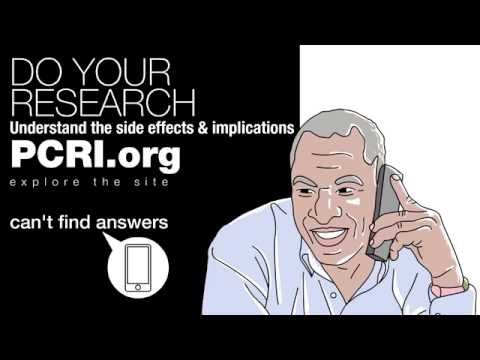

In [1]:
from IPython.display import IFrame, YouTubeVideo
YouTubeVideo('UuG__lpn8qQ',width=600, height=400)

### Q5)I got it but What is ISUP grade now?
According to current guidelines by the International Society of Urological Pathology (ISUP), the Gleason scores are summarized into an ISUP grade on a scale from 1 to 5 according to the following rule:

* Gleason score 6 = ISUP grade 1 
* Gleason score 7 (3 + 4) = ISUP grade 2 
* Gleason score 7 (4 + 3) = ISUP grade 3 
* Gleason score 8 = ISUP grade 4 
* Gleason score 9-10 = ISUP grade 5 

If there is no cancer in the sample, we use the label ISUP grade 0 in this competition. 

<img src="https://storage.googleapis.com/kaggle-media/competitions/PANDA/Screen%20Shot%202020-04-08%20at%202.03.53%20PM.png" height="100px">

### Q6) How has the Gleason scores been generated in the dataset?
Each WSI in this challenge contains one, or in some cases two, thin tissue sections cut from a single biopsy sample. Prior to scanning, the tissue is stained with haematoxylin & eosin (H&E). This is a standard way of staining the originally transparent tissue to produce some contrast. The samples are made up of glandular tissue and connective tissue. The glands are hollow structures, which can be seen as white “holes” or branched cavities in the WSI. The appearance of the glands forms the basis of the Gleason grading system. The glandular structure characteristic of healthy prostate tissue is progressively lost with increasing grade. The grading system recognizes three categories: 3, 4, and 5. 

* [A]Benign prostate glands with folded epithelium :The cytoplasm is pale and the nuclei small and regular. The glands are grouped together.
* [B]Prostatic adenocarcinoma : Gleason Pattern 3 has no loss of glandular differentiation. Small glands infiltrate between benign glands. The cytoplasm is often dark and the nuclei enlarged with dark chromatin and some prominent nucleoli. Each epithelial unit is separate and has a lumen.
* [C]Prostatic adenocarcinoma : Gleason Pattern 4 has partial loss of glandular differentiation. There is an attempt to form lumina but the tumor fails to form complete, well-developed glands. This microphotograph shows irregular cribriform cancer, i.e. epithelial sheets with multiple lumina. There are also some poorly formed small glands and some fused glands. All of these are included in Gleason Pattern 4.
* [D]Prostatic adenocarcinoma : Gleason Pattern 5 has an almost complete loss of glandular differentiation. Dispersed single cancer cells are seen in the stroma. Gleason Pattern 5 may also contain solid sheets or strands of cancer cells. All microphotographs show hematoxylin and eosin stains at 20x lens magnification.

<img src="https://storage.googleapis.com/kaggle-media/competitions/PANDA/GleasonPattern_4squares%20copy500.png" height="100px">

# Preliminaries
Now Let's Begin by Importing the data

In [2]:
#BASIC
import numpy as np 
import pandas as pd 
import os

# DATA visualization
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
from IPython.display import Image, display
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

import openslide


In [3]:
BASE_FOLDER = "/kaggle/input/prostate-cancer-grade-assessment/"
!ls {BASE_FOLDER}

sample_submission.csv  test.csv  train.csv  train_images  train_label_masks


In [4]:
mask_dir = f'{BASE_FOLDER}/train_label_masks'

In [5]:
train = pd.read_csv(BASE_FOLDER+"train.csv")
test = pd.read_csv(BASE_FOLDER+"test.csv")
sub = pd.read_csv(BASE_FOLDER+"sample_submission.csv")

In [6]:
train.head()

,image_id,data_provider,isup_grade,gleason_score
0,0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
1,000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0
2,0018ae58b01bdadc8e347995b69f99aa,radboud,4,4+4
3,001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4+4
4,001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0+0


**Now that we know everything about ISUP_grade and Gleason_score , let's look at how many unique values they have got, as per our guesses,ISUP must have 6 unique values (1-5 grades and 0 for non cancer) and Gleason_score should have 8 values in total (2-10 for scores))**

In [7]:
print("unique ids : ", len(train.image_id.unique()))
print("unique data provider : ", len(train.data_provider.unique()))
print("unique isup_grade(target) : ", len(train.isup_grade.unique()))
print("unique gleason_score : ", len(train.gleason_score.unique()))

unique ids :  10616
unique data provider :  2
unique isup_grade(target) :  6
unique gleason_score :  11


**Interesting Right? We were right about ISUP but gleason score has 11 unique values . Yes you right in thinking , there can be two values for gleason score 7 i.e (3+4 and 4+3) as we had learned in the video these both have different meanings .
Let's Verify if its the case**

In [8]:
train['gleason_score'].unique()

array(['0+0', '4+4', '3+3', '4+3', 'negative', '4+5', '3+4', '5+4', '5+5',
       '5+3', '3+5'], dtype=object)

**SO we can clearly see that our understanding was correct.However I wonder What the label 'Negative' means when we already have 0+0 for no cancer.
Let's check what is the ISUP grade for these gleason scores**

In [9]:
print(train[train['gleason_score']=='0+0']['isup_grade'].unique())
print(train[train['gleason_score']=='negative']['isup_grade'].unique())

[0]
[0]


That's Quite Interesting , they both map to zero ISUP grade . I wonder why there are two labels mapping to the same thing,let's also check their number

In [10]:
print(len(train[train['gleason_score']=='0+0']['isup_grade']))
print(len(train[train['gleason_score']=='negative']['isup_grade']))

1925
967


That's Quite a big number, it's (2892/10616) 27 oercent of the total data

**We have seem from the figure showing mappings of ISUP from gleason that 3+4 and 4+3 map to different ISUP scores while other pairs like 3-5 and 5-3 , 4-5 and 5-4 map to same ISUP , let's verify it**

In [11]:
print(train[(train['gleason_score']=='3+4') | (train['gleason_score']=='4+3')]['isup_grade'].unique())
print(train[(train['gleason_score']=='3+5') | (train['gleason_score']=='5+3')]['isup_grade'].unique())
print(train[(train['gleason_score']=='5+4') | (train['gleason_score']=='4+5')]['isup_grade'].unique())

[3 2]
[4]
[5]


Hence it is indeed the case<br>
**It is due to this reason, modeling this as a predictive problem for gleason score then converting it into ISUP is a much better strategy than to model it as ISUP predictive problem directly**<br><br>
Let's also check if 3+4 and 4+3 gleason scores maps to 2 and 3  respectively

In [12]:
print(train[train['gleason_score']=='3+4']['isup_grade'].unique())
print(train[train['gleason_score']=='4+3']['isup_grade'].unique())

[2]
[3 2]


We can see that 3+4 maps to one unique Isup i.e 2 but to our surprise 4+3 maps to two different values , hence we have some mislablled info here, Let's go ahead and check that

In [13]:
train[(train['isup_grade'] == 2) & (train['gleason_score'] == '4+3')]

,image_id,data_provider,isup_grade,gleason_score
7273,b0a92a74cb53899311acc30b7405e101,karolinska,2,4+3


We can see there is one mislabelled information like that, let's go ahead and drop this

In [14]:
train.drop([7273],inplace=True)

**Also negative and 0+0 are same labels only from different data-providers and are interchangeable**
<br>Let's go ahead and change negative to '0+0'

In [15]:
train['gleason_score'] = train['gleason_score'].apply(lambda x: "0+0" if x=="negative" else x)

### LET's now Look at the test file

In [16]:
print("shape : ", test.shape)
print("unique ids : ", len(test.image_id.unique()))
print("unique data provider : ", len(test.data_provider.unique()))

shape :  (3, 2)
unique ids :  3
unique data provider :  2


They are only 3 images in the test and they too are hidden and we have access to them only when we are submitting , for information on how to submit on hidden test set, read here : https://www.kaggle.com/c/prostate-cancer-grade-assessment/discussion/145219

# EDA
It's time that I start doing my favourite thing 
<br> Let's Start with the target

In [17]:
temp = train.groupby('isup_grade').count()['image_id'].reset_index().sort_values(by='image_id',ascending=False)
temp.style.background_gradient(cmap='Purples')

,isup_grade,image_id
0,0,2892
1,1,2666
2,2,1342
4,4,1249
3,3,1242
5,5,1224


In [18]:
fig = go.Figure(go.Funnelarea(
    text =temp.isup_grade,
    values = temp.image_id,
    title = {"position": "top center", "text": "Funnel-Chart of ISUP_grade Distribution"}
    ))
fig.show()

In [19]:
fig = px.bar(temp, x='isup_grade', y='image_id',
             hover_data=['image_id', 'isup_grade'], color='image_id',
             labels={'pop':'population of Canada'}, height=400)
fig.show()

We see that the isup_grade 0 and 1 i.e no cancer, has the most number of values and that's what expected in case of most medical datasets , the target class will always be underrepresented and that's also the most important challenge when performing machine learning tasks on Medical DATA

Now let's Look at how much data is provided by which data-provider

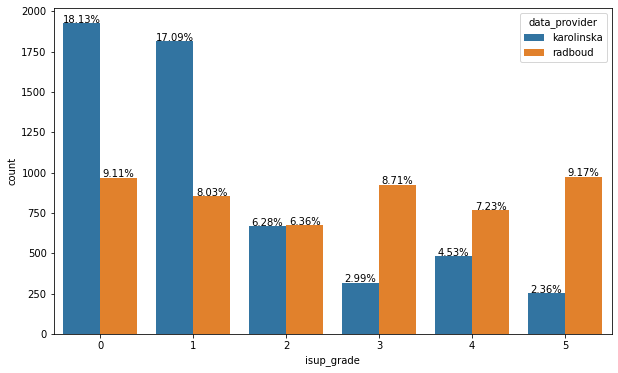

In [20]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x="isup_grade", hue="data_provider", data=train)
for p in ax.patches:
    '''
    Courtesy of Rohit Singh for teaching me this
    https://www.kaggle.com/rohitsingh9990/panda-eda-better-visualization-simple-baseline
    '''
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
                height +3,
                '{:1.2f}%'.format(100*height/10616),
                ha="center")

I learned about adding the numerical values i.e count and percentage on the countplot of seaborn from Rohit's kernels . I thought I knew EDA very well but indeed I was wrong . You can learn more about ax.patches here : https://medium.com/@dey.mallika/transform-your-graphs-with-seaborn-ea4fa8e606a6<br>
After learning go ahead and play around the parameters of ax.test() and ask any queries in the comment section<br><br>
One tip for Better visualization : always go through the documentation of the function you are using to visualize and play with all the parameters it takes , you will surprise yourself with suprisingly new things

Now Let's Look at the gleason score distribution as well

In [21]:
temp = train.groupby('gleason_score').count()['image_id'].reset_index().sort_values(by='image_id',ascending=False)
temp.style.background_gradient(cmap='Reds')

,gleason_score,image_id
0,0+0,2892
1,3+3,2666
2,3+4,1342
4,4+3,1242
5,4+4,1126
6,4+5,849
8,5+4,248
9,5+5,127
3,3+5,80
7,5+3,43


In [22]:
fig = go.Figure(go.Funnelarea(
    text =temp.gleason_score,
    values = temp.image_id,
    title = {"position": "top center", "text": "Funnel-Chart of ISUP_grade Distribution"}
    ))
fig.show()

In [23]:
fig = px.bar(temp, x='gleason_score', y='image_id',
             hover_data=['image_id', 'gleason_score'], color='image_id',
             labels={'pop':'population of Canada'}, height=400)
fig.show()

From this graph it is also clear that the data will be baised towards non-cancer examples

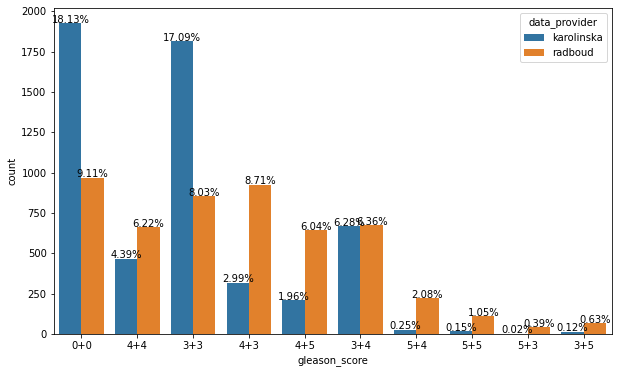

In [24]:
'''
Visualizing the GLEASON_SCORE distribution wrt Data_providers
'''

fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x="gleason_score", hue="data_provider", data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/10616),
                ha="center")

# Image EDA
Now we can finally move on to Image EDA . BUT since we are complete beginners, let's first+ understand the format of image that is provided to us and all the image related jargons that we will be using further

## Q1) What is .tff format and Why it is used?

Tagged Image File Format (TIFF) is a variable-resolution bitmapped image format developed by Aldus (now part of Adobe) in 1986. TIFF is very common for transporting color or gray-scale images into page layout applications, but is less suited to delivering web content.

Reasons for Usage:
* IFF files are large and of very high quality. Baseline TIFF images are highly portable; most graphics, desktop publishing, and word processing applications understand them.
* The TIFF specification is readily extensible, though this comes at the price of some of its portability. Many applications incorporate their own extensions, but a number of application-independent extensions are recognized by most programs.
* Four types of baseline TIFF images are available: bilevel (black and white), gray scale, palette (i.e., indexed), and RGB (i.e., true color). RGB images may store up to 16.7 million colors. Palette and gray-scale images are limited to 256 colors or shades. A common extension of TIFF also allows for CMYK images.
* TIFF files may or may not be compressed. A number of methods may be used to compress TIFF files, including the Huffman and LZW algorithms. Even compressed, TIFF files are usually much larger than similar GIF or JPEG files.
* Because the files are so large and because there are so many possible variations of each TIFF file type, few web browsers can display them without plug-ins.

## Q2) What are image levels?
In some image formats the image data has a fixed amount of possible intensities. For instance an image may be defined as uint8 (unsigned integer 8-bit) which means that each pixel can have a value (intensity) between 0-255, and each intensity is a whole number (integer) in that range. So that gives 256 possible intensity levels. Another way to interpret this would be layers. An RGB (red green blue) type image uses three layers to define colour (a single layer would define a large-scale image, some image types contain more than 3 layers). For each pixel there are 3 intensity levels, 1 for each colour, are defined and together (using a kind of mixing of the colours) they define the colour of that pixels. Similarly for a grayscale there can be two levels i.e black and white

## Q3) What is Down-sampling and Up-sampling in Image processing?
Downsampling and upsampling are two fundamental and widely used image operations, with
applications in image display, compression, and progressive transmission. Downsampling is
the reduction in spatial resolution while keeping the same two-dimensional (2D) representation. It is typically used to reduce the storage and/or transmission requirements of images.
Upsampling is the increasing of the spatial resolution while keeping the 2D representation
of an image. It is typically used for zooming in on a small region of an image, and for
eliminating the pixelation effect that arises when a low-resolution image is displayed on a
relatively large frame

Now that we know all this we are good to go.


<br> I will be using openslide to display images as I learned it in this competition from a very informative kernel:
https://www.kaggle.com/wouterbulten/getting-started-with-the-panda-dataset
<br>The benefit of OpenSlide is that we can load arbitrary regions of the slide, without loading the whole image in memory. Want to interactively view a slide? We have added an interactive viewer to this notebook in the last section.

You can read more about the OpenSlide python bindings in the documentation: https://openslide.org/api/python/

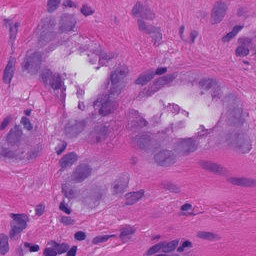

In [25]:
'''
Example for using Openslide to display an image
'''


# Open the image (does not yet read the image into memory)
example = openslide.OpenSlide(os.path.join(BASE_FOLDER+"train_images", '005e66f06bce9c2e49142536caf2f6ee.tiff'))

# Read a specific region of the image starting at upper left coordinate (x=17800, y=19500) on level 0 and extracting a 256*256 pixel patch.
# At this point image data is read from the file and loaded into memory.
patch = example.read_region((17800,19500), 0, (256, 256))

# Display the image
display(patch)

# Close the opened slide after use
example.close()

Now Let's see what all information can we get out of an image after creating an Openslide object

In [26]:
train = train.set_index('image_id')
train.head()

,data_provider,isup_grade,gleason_score
image_id,,,
0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0
0018ae58b01bdadc8e347995b69f99aa,radboud,4,4+4
001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4+4
001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0+0


In [27]:
def get_values(image,max_size=(600,400)):
    slide = openslide.OpenSlide(os.path.join(BASE_FOLDER+"train_images", f'{image}.tiff'))
    
    # Here we compute the "pixel spacing": the physical size of a pixel in the image.
    # OpenSlide gives the resolution in centimeters so we convert this to microns.
    f,ax =  plt.subplots(2 ,figsize=(6,16))
    spacing = 1 / (float(slide.properties['tiff.XResolution']) / 10000)
    patch = slide.read_region((1780,1950), 0, (256, 256)) #ZOOMED FUGURE
    ax[0].imshow(patch) 
    ax[0].set_title('Zoomed Image')
    
    
    ax[1].imshow(slide.get_thumbnail(size=max_size)) #UNZOOMED FIGURE
    ax[1].set_title('Full Image')
    
    
    print(f"File id: {slide}")
    print(f"Dimensions: {slide.dimensions}")
    print(f"Microns per pixel / pixel spacing: {spacing:.3f}")
    print(f"Number of levels in the image: {slide.level_count}")
    print(f"Downsample factor per level: {slide.level_downsamples}")
    print(f"Dimensions of levels: {slide.level_dimensions}\n\n")
    
    print(f"ISUP grade: {train.loc[image, 'isup_grade']}")
    print(f"Gleason score: {train.loc[image, 'gleason_score']}")

* This Function prints Zoomed and Non-Zoomed images side by side and also all the information that can be derived from it
* You can read about what every function does in the documentation of Open slide
* You can play around with the read_region to zoom in different parts of an image and by little modifications you can build a function that takes in multiple images and displays their zoomed and non-Zoomed Images side by side

File id: OpenSlide('/kaggle/input/prostate-cancer-grade-assessment/train_images/07a7ef0ba3bb0d6564a73f4f3e1c2293.tiff')
Dimensions: (24900, 29228)
Microns per pixel / pixel spacing: 0.503
Number of levels in the image: 3
Downsample factor per level: (1.0, 4.0, 16.00457121779945)
Dimensions of levels: ((24900, 29228), (6225, 7307), (1556, 1826))


ISUP grade: 4
Gleason score: 4+4


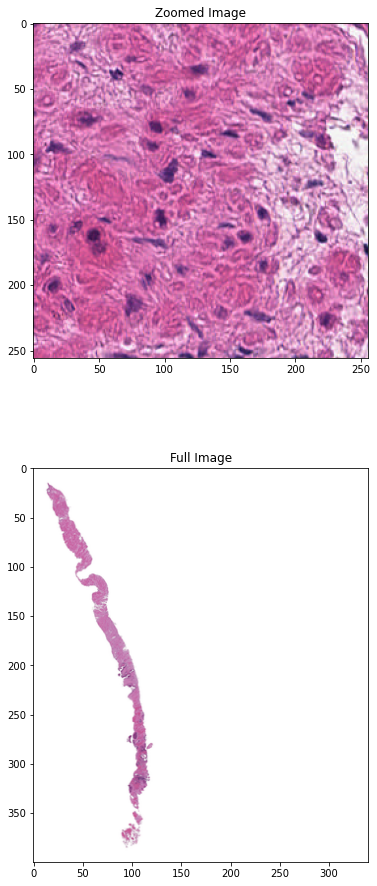

In [28]:
get_values('07a7ef0ba3bb0d6564a73f4f3e1c2293')

### Now Let's Look at the Zoomed Images having different ISUP and gleason_score

Looking at the images we can see and try to apply what we learned in the video for giving gleason_score

In [29]:
def display_images(images):
    '''
    This function takes in input a list of images. It then iterates through the image making openslide objects , on which different functions
    for getting out information can be called later
    '''
    f, ax = plt.subplots(5,3, figsize=(18,22))
    for i, image in enumerate(images):
        slide = openslide.OpenSlide(os.path.join(BASE_FOLDER+"train_images", f'{image}.tiff')) # Making Openslide Object
        #Here we compute the "pixel spacing": the physical size of a pixel in the image,
        #OpenSlide gives the resolution in centimeters so we convert this to microns
        spacing = 1/(float(slide.properties['tiff.XResolution']) / 10000)
        patch = slide.read_region((1780,1950), 0, (256, 256)) #Reading the image as before betweeen x=1780 to y=1950 and of pixel size =256*256
        ax[i//3, i%3].imshow(patch) #Displaying Image
        slide.close()       
        ax[i//3, i%3].axis('off')
        
        image_id = image
        data_provider = train.loc[image, 'data_provider']
        isup_grade = train.loc[image, 'isup_grade']
        gleason_score = train.loc[image, 'gleason_score']
        ax[i//3, i%3].set_title(f"ID: {image_id}\nSource: {data_provider} ISUP: {isup_grade} Gleason: {gleason_score}")

    plt.show() 

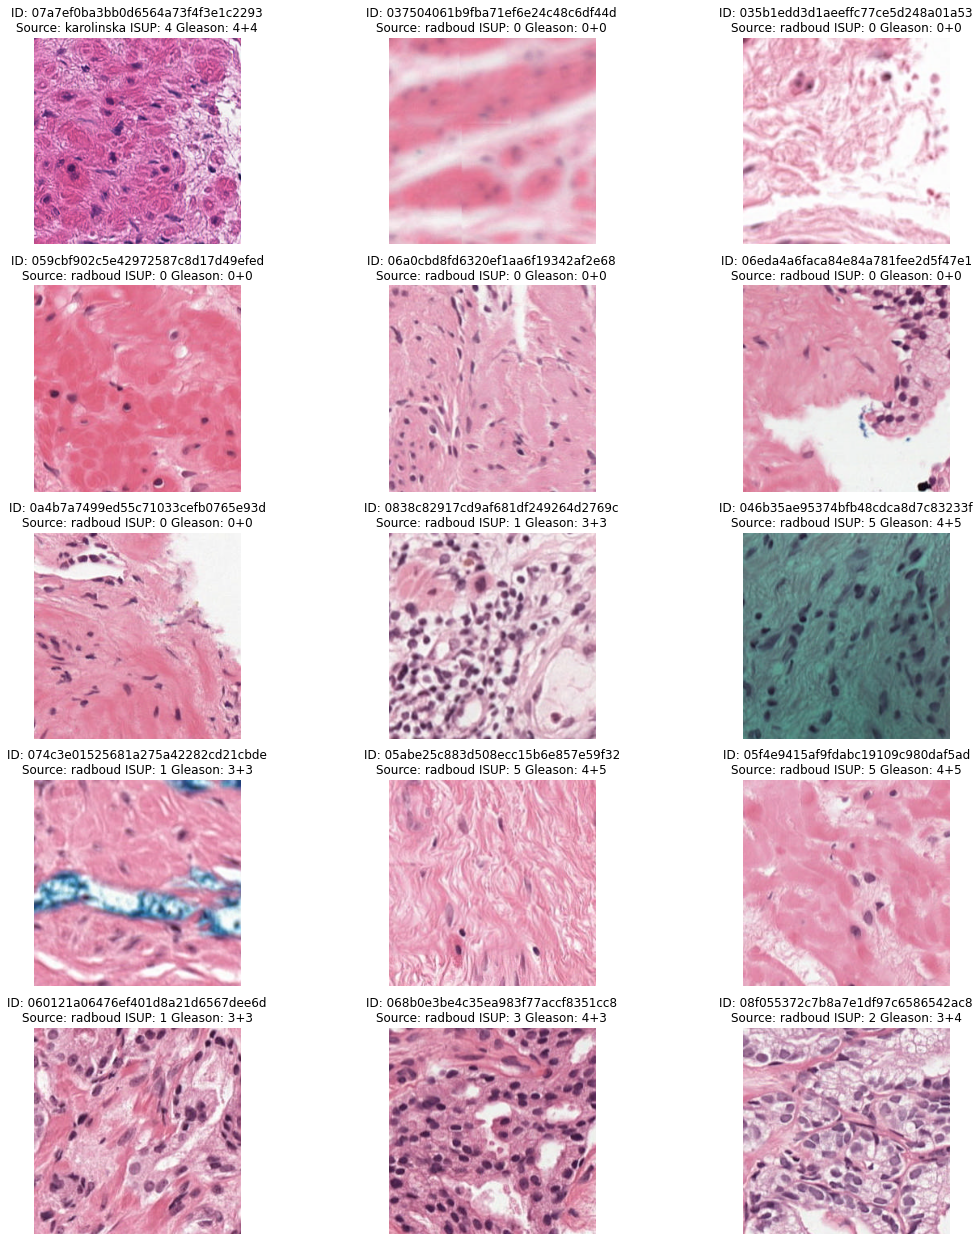

In [30]:
images = [
'07a7ef0ba3bb0d6564a73f4f3e1c2293',
    '037504061b9fba71ef6e24c48c6df44d',
    '035b1edd3d1aeeffc77ce5d248a01a53',
    '059cbf902c5e42972587c8d17d49efed',
    '06a0cbd8fd6320ef1aa6f19342af2e68',
    '06eda4a6faca84e84a781fee2d5f47e1',
    '0a4b7a7499ed55c71033cefb0765e93d',
    '0838c82917cd9af681df249264d2769c',
    '046b35ae95374bfb48cdca8d7c83233f',
    '074c3e01525681a275a42282cd21cbde',
    '05abe25c883d508ecc15b6e857e59f32',
    '05f4e9415af9fdabc19109c980daf5ad',
    '060121a06476ef401d8a21d6567dee6d',
    '068b0e3be4c35ea983f77accf8351cc8',
    '08f055372c7b8a7e1df97c6586542ac8'
]

display_images(images)

OBSERVATIONS:

* The image dimensions are quite large (typically between 5.000 and 40.000 pixels in both x and y).
* Each slide has 3 levels you can load, corresponding to a downsampling of 1, 4 and 16. Intermediate levels can be created by downsampling a higher resolution level.
* The dimensions of each level differ based on the dimensions of the original image.
* Biopsies can be in different rotations. This rotation has no clinical value, and is only dependent on how the biopsy was collected in the lab.
* There are noticable color differences between the biopsies, this is very common within pathology and is caused by different laboratory procedures.

## Understanding Masks

### Q) What are masks?

Apart from the slide-level label (present in the csv file), almost all slides in the training set have an associated mask with additional label information. These masks directly indicate which parts of the tissue are healthy and which are cancerous.hese masks are provided to assist with the development of strategies for selecting the most useful subsamples of the images. The mask values depend on the data provider:

* Radboud: Prostate glands are individually labelled, Valid values are:
           0: background (non tissue) or unknown
           1: stroma (connective tissue, non-epithelium tissue)
           2: healthy (benign) epithelium
           3: cancerous epithelium (Gleason 3)
           4: cancerous epithelium (Gleason 4)
           5: cancerous epithelium (Gleason 5)

* Karolinska: Regions are labelled, Valid values are:
              1: background (non tissue) or unknown
              2: benign tissue (stroma and epithelium combined)
              3: cancerous tissue (stroma and epithelium combined)

### Q)What happens when we visualize masks using the techniques we know?

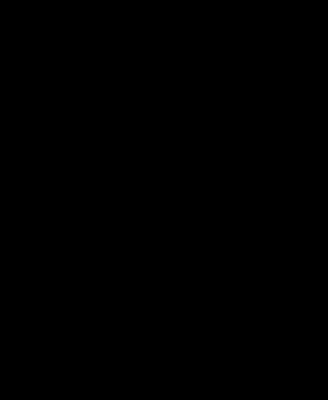

In [31]:
example_mask =  openslide.OpenSlide(os.path.join(mask_dir, f'{"00412139e6b04d1e1cee8421f38f6e90"}_mask.tiff'))
display(example_mask.get_thumbnail(size=(600,400)))

## Q)A black canvas is displayed , Surprised ?? Wondering what that means? The Masks for Train are in RGB format right as said by organizers.

This happens for the following two reasons : 

* The label information is stored in the red (R) channel, the other channels are *set to zero and can be ignored*. 

* The masks are not image data like the WSIs.They are just matrices with values based on the data provider information provided above, instead of containing a range of values from 0 to 255, they only go up to a maximum of 6, representing the different class labels (check the dataset description for details on mask labels). Therefor when you try to visualize the mask, it will appear very dark as every value is close to 0. Applying the color map fixes the problem by assigning each label between 0 and 6 a distinct color.

So what we need to do is to grab read the image file using openslide object, take out the values of Red Level and then apply cmap to it

Using a small helper function we can display some basic information about a mask. To more easily inspect the masks, we map the int labels to RGB colors using a color palette. If you prefer something like matplotlib you can also use plt.imshow() to directly show a mask (without converting it to an RGB image).

In [32]:
import matplotlib
def display_masks(slides):    
    f, ax = plt.subplots(2,3, figsize=(18,22))
    for i, slide in enumerate(slides):
        
        mask = openslide.OpenSlide(os.path.join(mask_dir, f'{slide}_mask.tiff'))
        mask_data = mask.read_region((0,0), mask.level_count - 1, mask.level_dimensions[-1])
        cmap = matplotlib.colors.ListedColormap(['black', 'gray', 'green', 'yellow', 'orange', 'red'])

        ax[i//3, i%3].imshow(np.asarray(mask_data)[:,:,0], cmap=cmap, interpolation='nearest', vmin=0, vmax=5) 
        mask.close()       
        ax[i//3, i%3].axis('off')
        
        image_id = slide
        data_provider = train.loc[slide, 'data_provider']
        isup_grade = train.loc[slide, 'isup_grade']
        gleason_score = train.loc[slide, 'gleason_score']
        ax[i//3, i%3].set_title(f"ID: {image_id}\nSource: {data_provider} ISUP: {isup_grade} Gleason: {gleason_score}")
        f.tight_layout()
        
    plt.show()

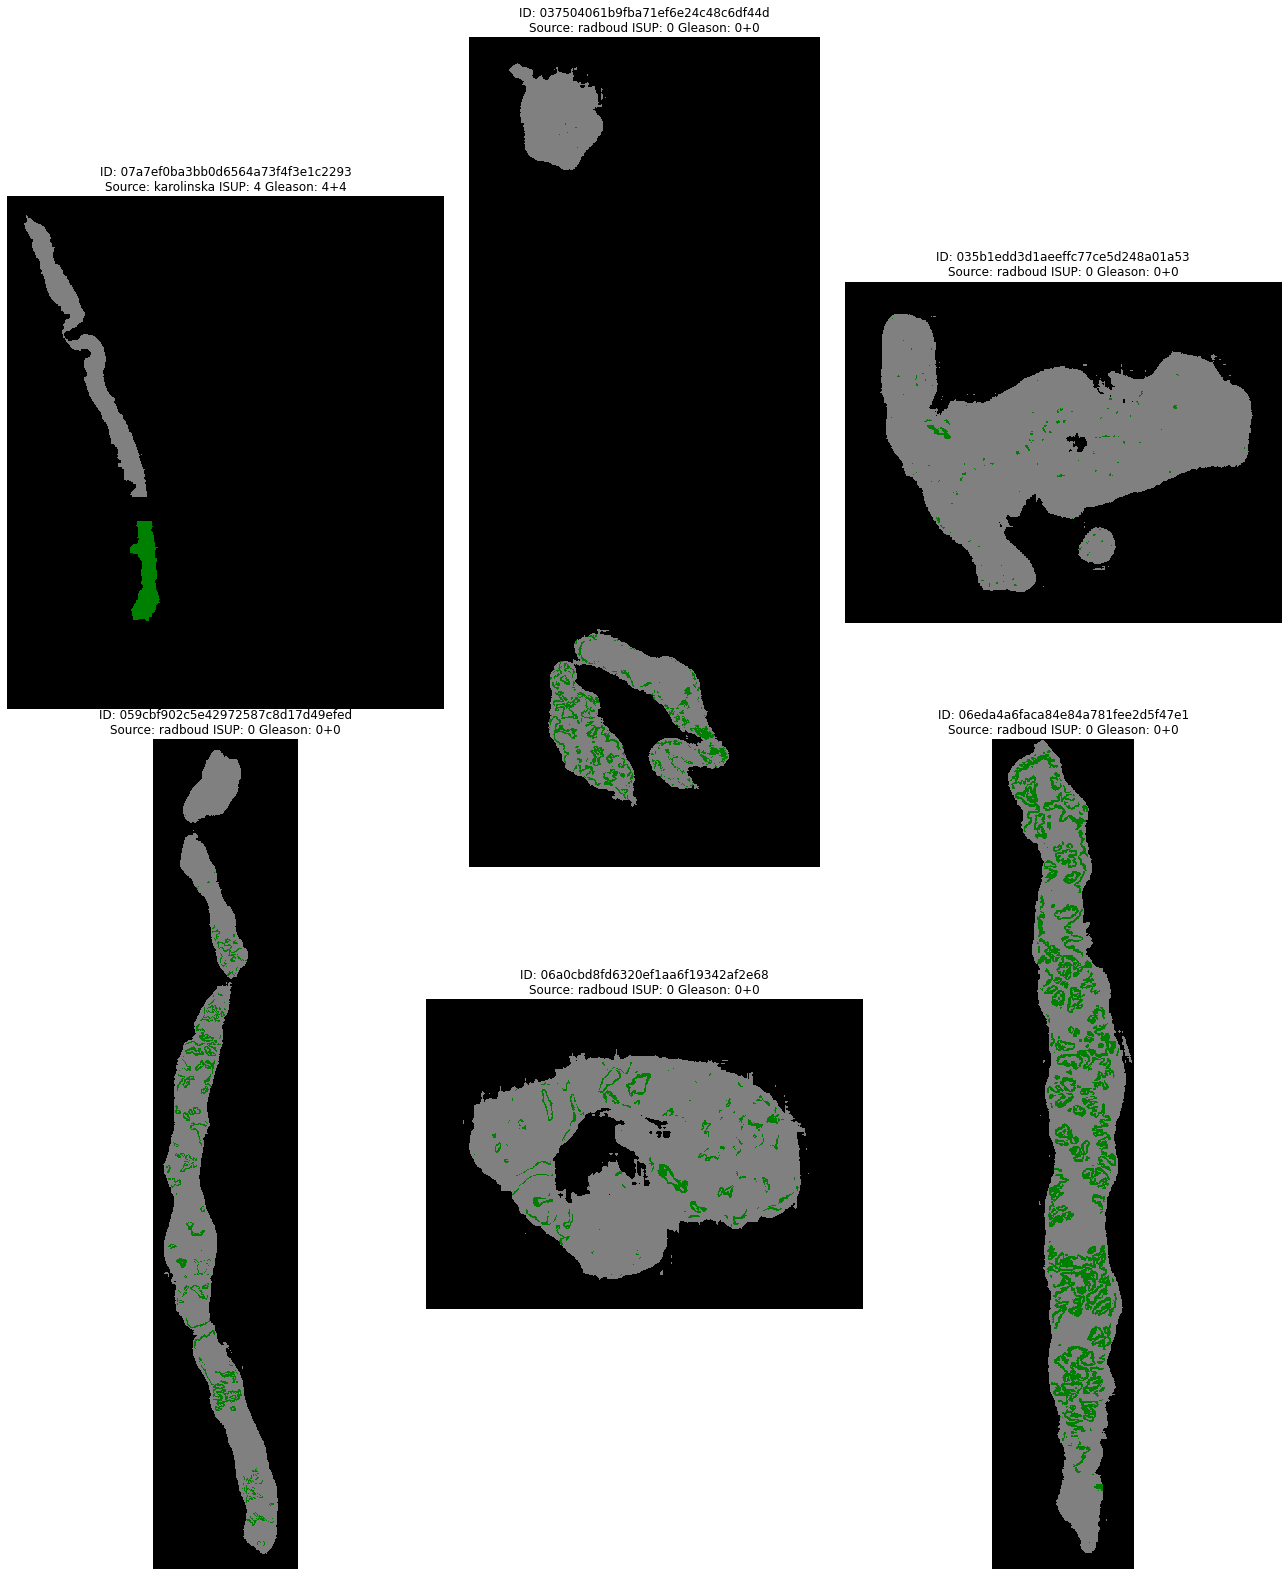

In [33]:
display_masks(images[:6]) #Visualizing Only six Examples

**Now that we have learned how to visualize masks , let's build a function which prints an image and its mask side by side (provided that there is a mask)**

In [34]:
def mask_img(image,max_size=(600,400)):
    slide = openslide.OpenSlide(os.path.join(BASE_FOLDER+"train_images", f'{image}.tiff'))
    mask =  openslide.OpenSlide(os.path.join(mask_dir, f'{image}_mask.tiff'))
    # Here we compute the "pixel spacing": the physical size of a pixel in the image.
    # OpenSlide gives the resolution in centimeters so we convert this to microns.
    f,ax =  plt.subplots(1,2 ,figsize=(18,22))
    spacing = 1 / (float(slide.properties['tiff.XResolution']) / 10000)
    img = slide.get_thumbnail(size=(600,400)) #IMAGE 
    
    mask_data = mask.read_region((0,0), mask.level_count - 1, mask.level_dimensions[-1])
    cmap = matplotlib.colors.ListedColormap(['black', 'gray', 'green', 'yellow', 'orange', 'red'])
    
    ax[0].imshow(img) 
    #ax[0].set_title('Image')
    
    
    ax[1].imshow(np.asarray(mask_data)[:,:,0], cmap=cmap, interpolation='nearest', vmin=0, vmax=5) #IMAGE MASKS
    #ax[1].set_title('Image_MASK')
    
    
    image_id = image
    data_provider = train.loc[image, 'data_provider']
    isup_grade = train.loc[image, 'isup_grade']
    gleason_score = train.loc[image, 'gleason_score']
    ax[0].set_title(f"ID: {image_id}\nSource: {data_provider} ISUP: {isup_grade} Gleason: {gleason_score} IMAGE")
    ax[1].set_title(f"ID: {image_id}\nSource: {data_provider} ISUP: {isup_grade} Gleason: {gleason_score} IMAGE_MASK")

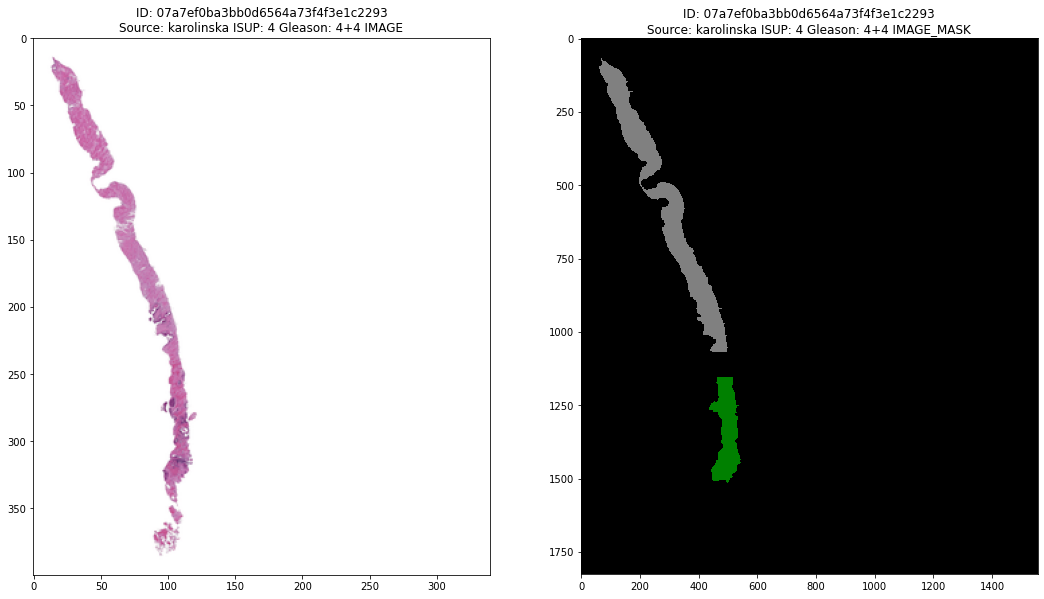

In [35]:
mask_img('07a7ef0ba3bb0d6564a73f4f3e1c2293')

So we are successful , we can easily use this function to visualize on more than example by doing something like this:

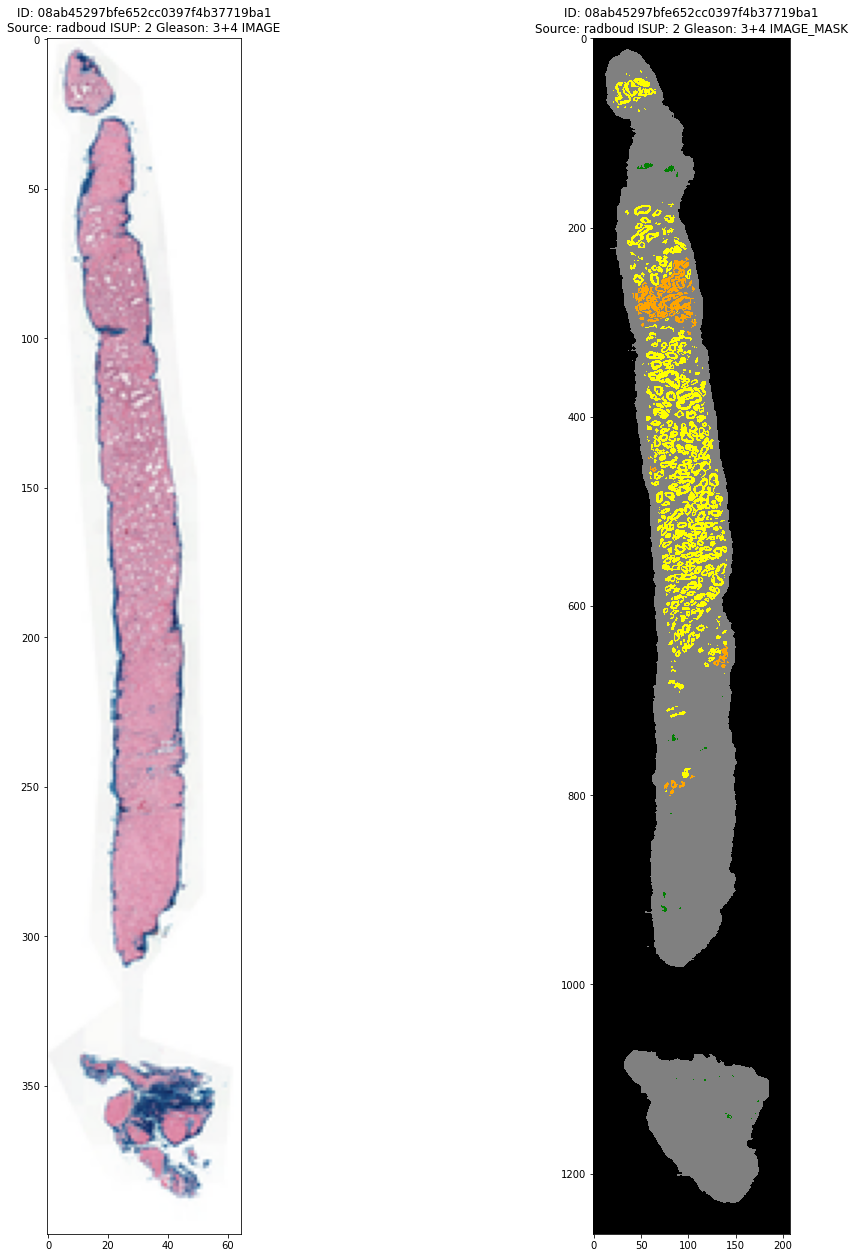

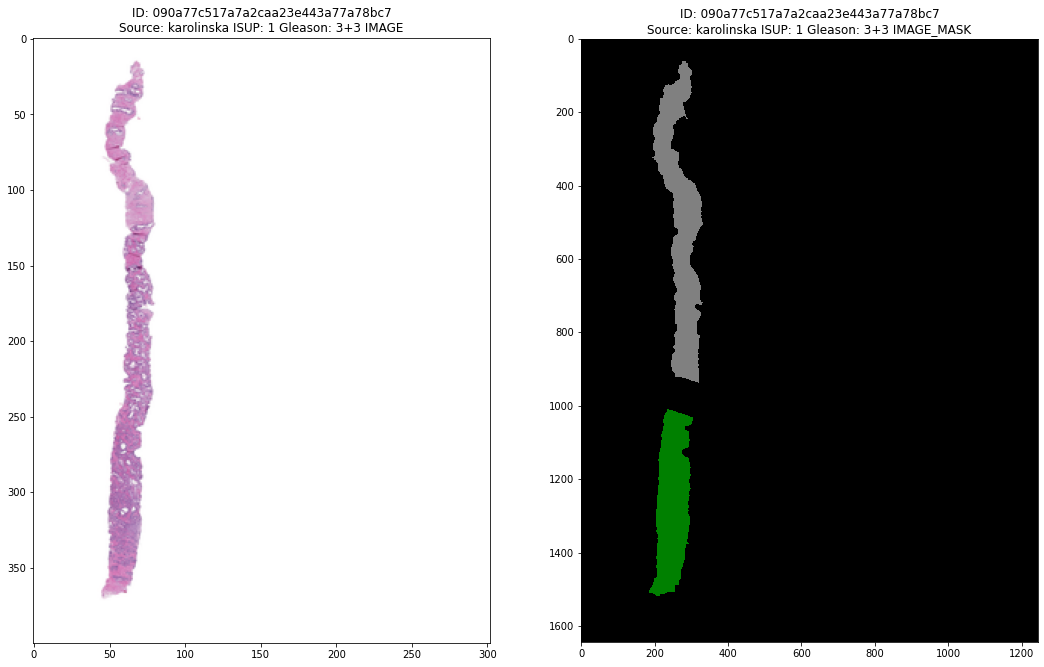

In [36]:
images1= [
    '08ab45297bfe652cc0397f4b37719ba1',
    '090a77c517a7a2caa23e443a77a78bc7'
]

for image in images1:
    mask_img(image)

Observations:
* The images above shows two example masks from the dataset.The first mask is from Radboudumc and shows two different grades of cancer (shown in yellow and orange). The second mask is from Karolinska, the region that contains cancer is higlighted in green.

* Note that in the second example, eventhough a biopsy contains cancer, not all epithelial tissue has to be cancerous.Thus, Biopsies can contain a mix of cancerous and healthy tissue.

## Differentiating between cancerous and non-cancerous areas using MASKS

Idea Credits: https://www.kaggle.com/akensert/panda-drawing-rectangles-work-in-progress

We will now visualize the cancerous and non-cancerous areas of an image using image_masks and since we know masks are different for different data providers we will have to take into account in the function we built

In [37]:
def differentiate_cancerous(image_mask):
    mask =  openslide.OpenSlide(os.path.join(mask_dir, f'{image_mask}_mask.tiff'))
    mask_level = mask.read_region((0,0),mask.level_count - 1,mask.level_dimensions[-1]) #Selecting the level
    mask_data = np.asarray(mask_level)[:,:,0] #SELECTING R from RGB
    
    mask_background = np.where(mask_data == 0, 1, 0).astype(np.uint8) # SELECTING BG
    mask_benign = np.where(mask_data == 1, 1, 0).astype(np.uint8) #SELECTING BENIGN LABELS
    
    if train.loc[image_mask,'data_provider'] == 'karolinska':
        mask_cancerous = np.where(mask_data == 2, 1, 0).astype(np.uint8) #SELECTING CANCEROUS LABELS
    elif train.loc[image_mask,'data_provider'] == 'radboud':
        mask_cancerous = np.where(mask_data == 5, 1, 0).astype(np.uint8) #SELECTING NON-CANCEROUS LABELS
        
    return mask_background,mask_benign,mask_cancerous

Now that we have our function let's visualize

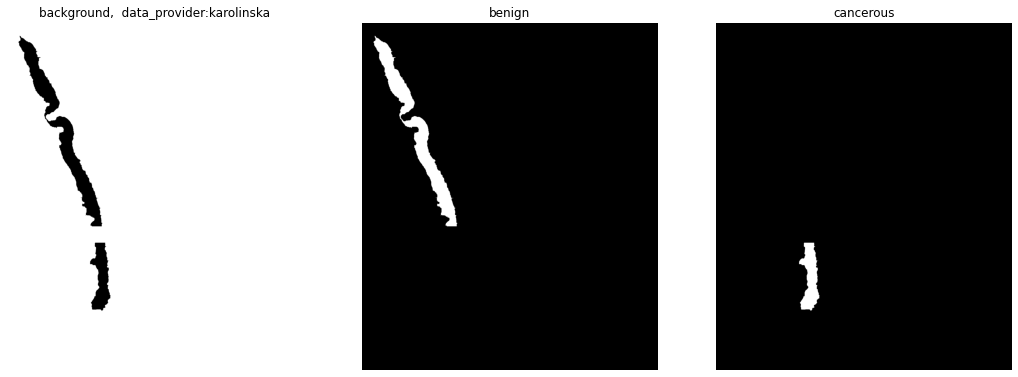

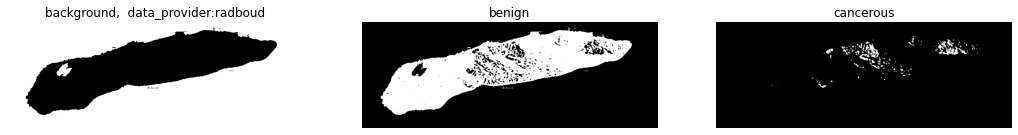

In [38]:
image2 =[ '07a7ef0ba3bb0d6564a73f4f3e1c2293',
    'ffdc59cd580a1468eac0e6a32dd1ff2d']

for image in image2:
    background,benign,cancerous = differentiate_cancerous(image)

    #if train.loc[image,'data_provider'] == 'karolinska'
    fig, ax = plt.subplots(1, 3, figsize=(18, 12))

    ax[0].imshow(background.astype(float), cmap=plt.cm.gray)
    ax[0].axis('off')
    ax[0].set_title('background,'+'  '+'data_provider:'+train.loc[image]["data_provider"]);
    ax[1].imshow(benign.astype(float), cmap=plt.cm.gray)
    ax[1].axis('off')
    ax[1].set_title('benign');
    ax[2].imshow(cancerous.astype(float), cmap=plt.cm.gray)
    ax[2].axis('off')
    ax[2].set_title('cancerous')

## Overlaying masks on the slides
Now That we have learned how to visualize masks and display them side by side , Let's Overlay them on one another

As the masks have the same dimension as the slides, we can overlay the masks on the tissue to directly see which areas are cancerous. This overlay can help you identifying the different growth patterns. To do this, we load both the mask and the biopsy and merge them using PIL.

In [39]:
def overlay_mask_on_slide(images, center='radboud', alpha=0.8, max_size=(800, 800)):
    """Show a mask overlayed on a slide."""
    f, ax = plt.subplots(2,3, figsize=(18,22))
    
    
    for i, image_id in enumerate(images):
        slide = openslide.OpenSlide(os.path.join(BASE_FOLDER+"train_images", f'{image_id}.tiff'))
        mask = openslide.OpenSlide(os.path.join(mask_dir, f'{image_id}_mask.tiff'))
        slide_data = slide.read_region((0,0), slide.level_count - 1, slide.level_dimensions[-1])
        mask_data = mask.read_region((0,0), mask.level_count - 1, mask.level_dimensions[-1])
        mask_data = mask_data.split()[0]
        
        # Create alpha mask
        alpha_int = int(round(255*alpha))
        if center == 'radboud':
            alpha_content = np.less(mask_data.split()[0], 2).astype('uint8') * alpha_int + (255 - alpha_int)
        elif center == 'karolinska':
            alpha_content = np.less(mask_data.split()[0], 1).astype('uint8') * alpha_int + (255 - alpha_int)

        alpha_content = PIL.Image.fromarray(alpha_content)
        preview_palette = np.zeros(shape=768, dtype=int)

        if center == 'radboud':
            # Mapping: {0: background, 1: stroma, 2: benign epithelium, 3: Gleason 3, 4: Gleason 4, 5: Gleason 5}
            preview_palette[0:18] = (np.array([0, 0, 0, 0.5, 0.5, 0.5, 0, 1, 0, 1, 1, 0.7, 1, 0.5, 0, 1, 0, 0]) * 255).astype(int)
        elif center == 'karolinska':
            # Mapping: {0: background, 1: benign, 2: cancer}
            preview_palette[0:9] = (np.array([0, 0, 0, 0, 1, 0, 1, 0, 0]) * 255).astype(int)

        mask_data.putpalette(data=preview_palette.tolist())
        mask_rgb = mask_data.convert(mode='RGB')
        overlayed_image = PIL.Image.composite(image1=slide_data, image2=mask_rgb, mask=alpha_content)
        overlayed_image.thumbnail(size=max_size, resample=0)

        
        ax[i//3, i%3].imshow(overlayed_image) 
        slide.close()
        mask.close()       
        ax[i//3, i%3].axis('off')
        
        data_provider = train.loc[image_id, 'data_provider']
        isup_grade = train.loc[image_id, 'isup_grade']
        gleason_score = train.loc[image_id, 'gleason_score']
        ax[i//3, i%3].set_title(f"ID: {image_id}\nSource: {data_provider} ISUP: {isup_grade} Gleason: {gleason_score}")

We will look at only 6 examples for better visuals

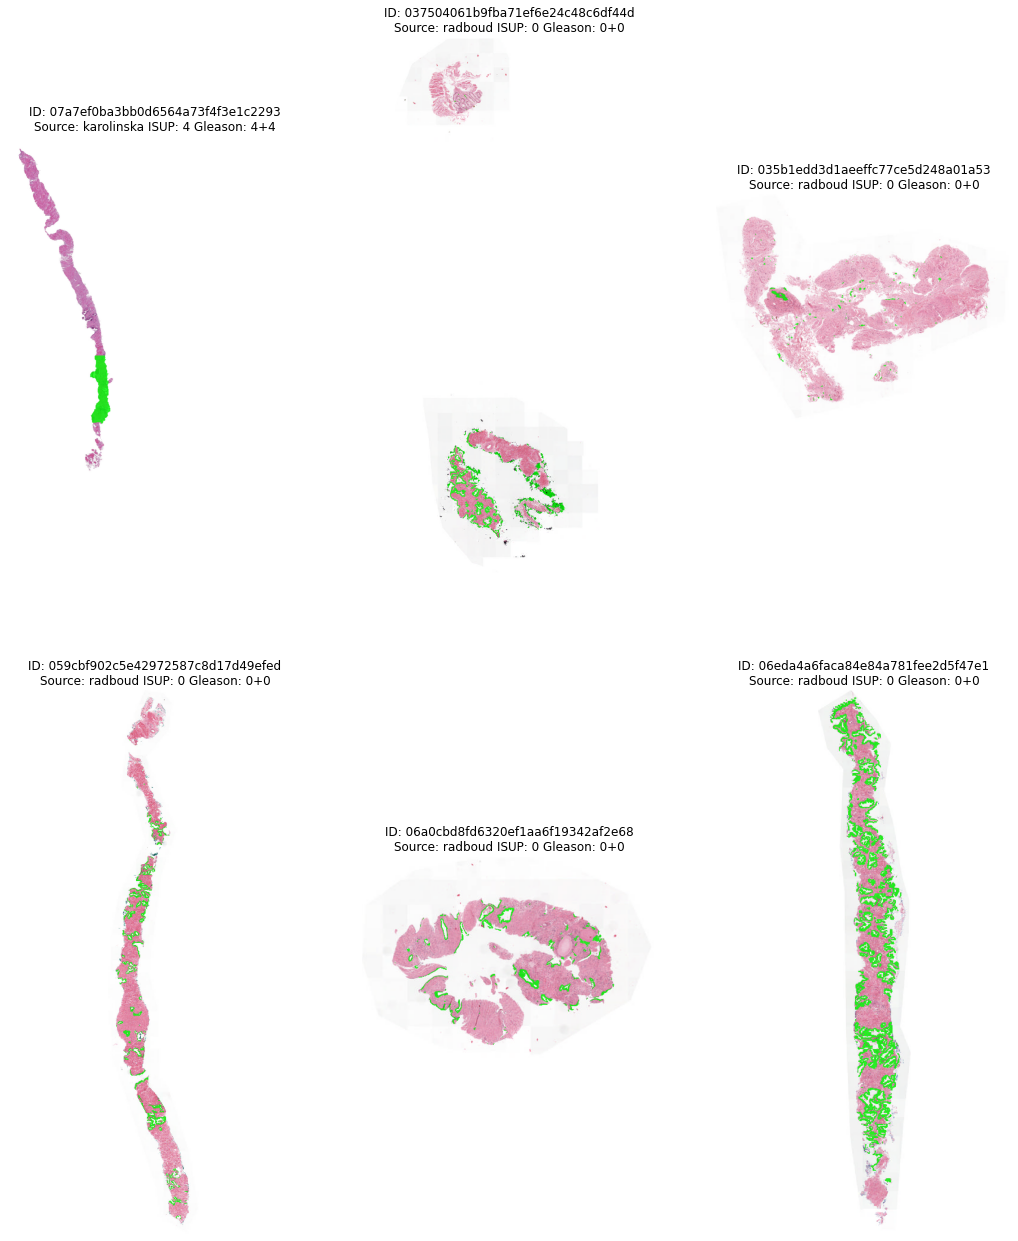

In [40]:
overlay_mask_on_slide(images[:6])

Lastly I will add heights and widths of images to my dataframe as it will help with my baseline

In [41]:
dims, spacings, level_counts = [], [], []
down_levels, level_dims = [], []

for i in train.reset_index().image_id:
    slide = openslide.OpenSlide(BASE_FOLDER+"train_images/"+i+".tiff")
    spacing = 1 / (float(slide.properties['tiff.XResolution']) / 10000)
    dims.append(slide.dimensions)
    spacings.append(spacing)
    level_counts.append(slide.level_count)
    down_levels.append(slide.level_downsamples)
    level_dims.append(slide.level_dimensions)
    slide.close()
    del slide

train['width']  = [i[0] for i in dims]
train['height'] = [i[1] for i in dims]

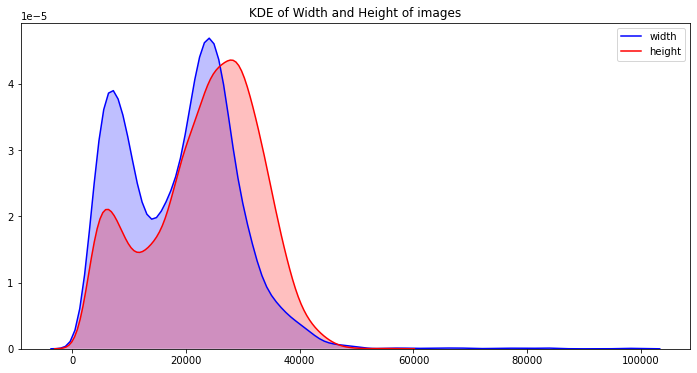

In [42]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(train['width'], shade=True, color="b").set_title('KDE of Width and Height of images')
p2=sns.kdeplot(train['height'], shade=True, color="r")
plt.legend(labels=['width','height'])

* We can see that width and height have almost similar distribution, let's now quickly load some images using openslide and try to interpret them<br>
* We saw as an example of how we can load data using openslide and then visualize a specific area and in our choice of pixel distribution<br>
* We will now see how we can see openslide to gather information about the images

# What's Next
This is my first encounter with image data and I am also learning everything at the same data. I have learned everything about the visualizations from here:
* https://www.kaggle.com/wouterbulten/getting-started-with-the-panda-dataset

Updates :
* I have shared few more insights about the data
* I have explained how to create the image visualizations in detail
* I have explained everything there is , about the mask provided to us for train set


This is what you can expect in future versions of this kernel:
* New,unique and improved Visualizations
* New Insights about the Data
* Baseline Model
* Complete Explanation of DEEP LEARNING TECHNIQUES to be used

# END NOTES
This notebook is work in progress. I am a beginner on Kaggle and this is my first Image/Computer Vision related competition.I am learning with every passing day, I try to do atleast what I am good at i.e EDA and getting Insights from data and then I build around this core by learning from some very great kernels posted on competitions.
Since Kaggle provide us so many days for a competition , we can always start from zero and end up learning all of the state of the art techniques just by following along a competition.That is what my strategy is all about.
I also want to emphasize the fact that there is no need to be scared of Kaggle competitions, I mean as a rookie we don't have anything to loose , we can try out different things without fear and that's what I am doing and you can do too.
I will keep on updating this kernel with my new findings,learning process,explained techniques,etc in order to help everyone who is just beginning

**<span style="color:Red">I hope you Liked my kernel. An upvote is a gesture of appreciation and encouragement that fills me with energy to keep improving my efforts ,be kind to show one ;-)**

STAY TUNED!